In [1]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf


from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential

In [2]:
#extra code added to clear the string(date) which is there in between
def set_str(dataset):
    for i in range(len(dataset)):
        for j in range(len(dataset[0])):
            if isinstance(dataset[i][j],str):
                dataset[i][j]=0

In [4]:
def train():
    #this is created in the clinical preprocess jupyter notebook
    # X_train = pd.read_pickle("clinical_train/X_train_c.pkl")
    # y_train = pd.read_pickle("clinical_train/y_train_c.pkl")

    # X_test = pd.read_pickle("clinical_train/X_test_c.pkl")
    # y_test = pd.read_pickle("clinical_train/y_test_c.pkl")


    with open("clinical_train/X_train_c.pkl",'rb') as f:
        X_train=np.load(f,allow_pickle=True)
    with open("clinical_train/y_train_c.pkl",'rb') as f:
        y_train=np.load(f,allow_pickle=True)
    with open("clinical_train/X_test_c.pkl",'rb') as f:
        X_test=np.load(f,allow_pickle=True)
    with open("clinical_train/y_test_c.pkl",'rb') as f:
        y_test=np.load(f,allow_pickle=True)
 
 

    set_str(X_train)
    set_str(X_test)
            

    X_train=np.asarray(X_train).astype(np.float32)
    y_train=np.asarray(y_train).astype(np.float32)
    X_test=np.asarray(X_test).astype(np.float32)
    y_test=np.asarray(y_test).astype(np.float32)


    model = Sequential()
    # model.add(Dense(128, input_shape = (185,), activation = "relu"))
    model.add(Dense(128, input_shape = (len(X_test[0]),), activation = "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(50, activation = "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(3, activation = "softmax"))
    
    model.compile(Adam(learning_rate = 0.0001), "sparse_categorical_crossentropy", metrics = ["sparse_categorical_accuracy"])
    
    model.summary()
    
    
    history = model.fit(X_train, y_train,  epochs=100, validation_split=0.1, batch_size=32,verbose=1) 
    model.save("./saved_models/train_clinical_model_base.hdf5")
    
    

    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    plt.clf()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    #plt.savefig('snp_loss.png')
    plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               23424     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

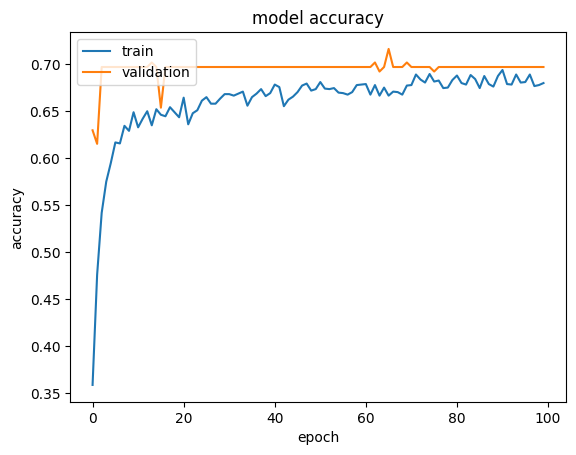

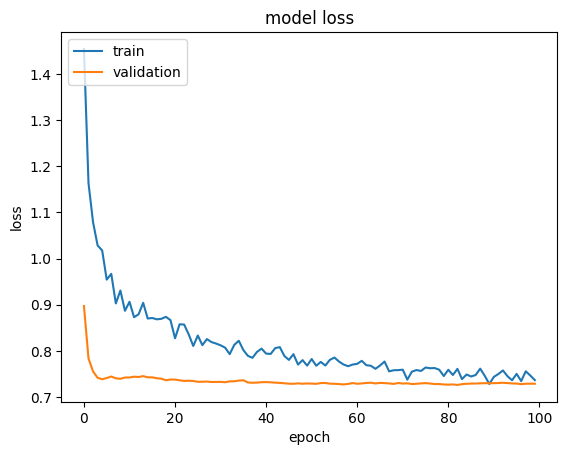

In [5]:
train()